# Credit Default Prediction
**Business Understanding:**

    In this project, we will build a model to predict whether a given customer defaults or not. Credit default is one of the most important problems in the banking and risk analytics industry. There are various attributes which can be used to predict default, such as demographic data (age, income, employment status, etc.), (credit) behavioural data (past loans, payment, number of times a credit payment has been delayed by the customer etc.).

We'll start the process with data cleaning and preparation and then tune the model to find optimal hyperparameters.



# Data Understanding and Cleaning

In [1]:
import logging

logger = logging.getLogger()

file_handler = logging.FileHandler(filename='project_log.log', mode='w')
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)

logger.setLevel(logging.DEBUG)
logger.info('PROJECT FILE STARTS RUNNING!')

In [2]:
logger.info('Importing Libraries')

In [3]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve

import pickle

import warnings
warnings.filterwarnings('ignore')

logger.info('LIBRARIES IMPORTED')

In [4]:
# Reading the csv file and putting it into 'CC_DF' object.
CC_DF = pd.read_csv(r"C:\Users\vacha\Downloads\Credit-Card-Default-master\Credit-Card-Default-master\credit-card-default.csv")
CC_DF.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
logger.info('DATA IMPORTED AND SAVING INTO PANDAS DATAFRAME!')

# EDA

In [6]:
logger.info('EDA STARTED')

In [7]:
print('Number of Columns - ',len(CC_DF.columns))
print('Names of columns - ',CC_DF.columns)

Number of Columns -  25
Names of columns -  Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'defaulted'],
      dtype='object')


There are 25(including ID) variables:

    ID: ID of each client
    LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
    SEX: Gender (1=male, 2=female)
    EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
    MARRIAGE: Marital status (1=married, 2=single, 3=others)
    AGE: Age in years
    PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
    PAY_2: Repayment status in August, 2005 (scale same as above)
    PAY_3: Repayment status in July, 2005 (scale same as above)
    PAY_4: Repayment status in June, 2005 (scale same as above)
    PAY_5: Repayment status in May, 2005 (scale same as above)
    PAY_6: Repayment status in April, 2005 (scale same as above)
    BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
    BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
    BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
    BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
    BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
    BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
    PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
    PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
    PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
    PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
    PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
    PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
    defaulted: Default payment (1=yes, 0=no)

In [8]:
# ID is a uniqe and diffrent for customer to customr, So dropping it
CC_DF.drop('ID',axis=1,inplace=True)

In [9]:
# Lets see the basic information of the data
CC_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

- All the 24 column contains numbers with dat type int
- There are 30000 customer data
- There 0 missing values in data

<function matplotlib.pyplot.show(close=None, block=None)>

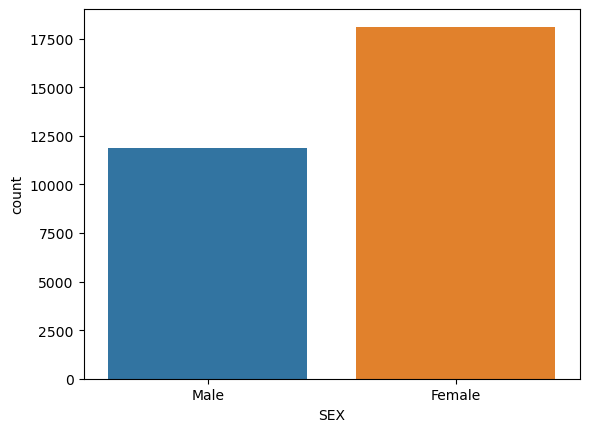

In [10]:
sns.countplot(x=CC_DF['SEX'])
plt.xticks(ticks=[0,1],labels=['Male','Female'])
plt.show

    Compare to Male Female Credit card users are more

<function matplotlib.pyplot.show(close=None, block=None)>

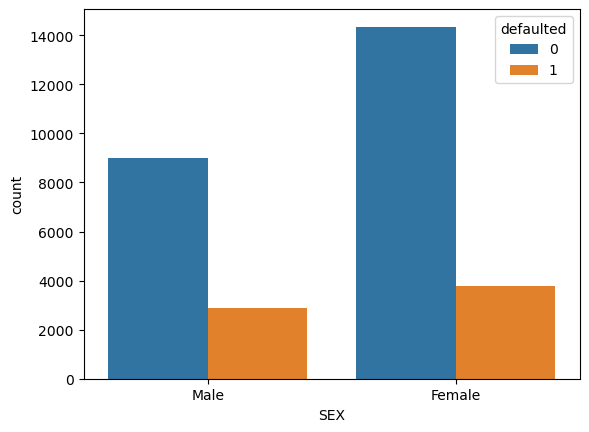

In [11]:
sns.countplot(x=CC_DF['SEX'],hue=CC_DF['defaulted'])
plt.xticks(ticks=[0,1],labels=['Male','Female'])
plt.show

    Female are holding more credit cards than male but the default is low compare to the male defaulters. Male are holding less number of card compare to female but the defaulters rate is high

In [12]:
#MARRIAGE: Marital status (1=married, 2=single, 3=others)
CC_DF['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [13]:
# As the marriage status will be married or not and there are 323+54 data which is coming under other, I will convert them to singal(2)
CC_DF['MARRIAGE']=CC_DF['MARRIAGE'].apply(lambda x : 2 if x >2 or x < 1 else x)

In [14]:
CC_DF['MARRIAGE'].value_counts()

2    16341
1    13659
Name: MARRIAGE, dtype: int64

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

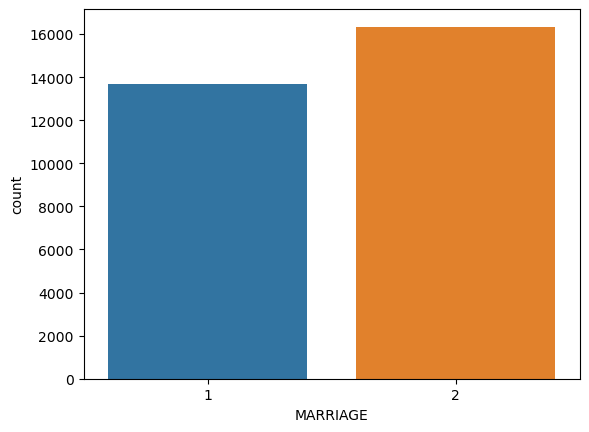

In [15]:
sns.countplot(x=CC_DF['MARRIAGE'])

Now both are almost equal

In [16]:
#EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
CC_DF['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [17]:
# As 5,6,0 are unknown I am considering under others
CC_DF['EDUCATION']=CC_DF['EDUCATION'].apply(lambda x : 4 if x >4 or x < 1 else x)
CC_DF['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

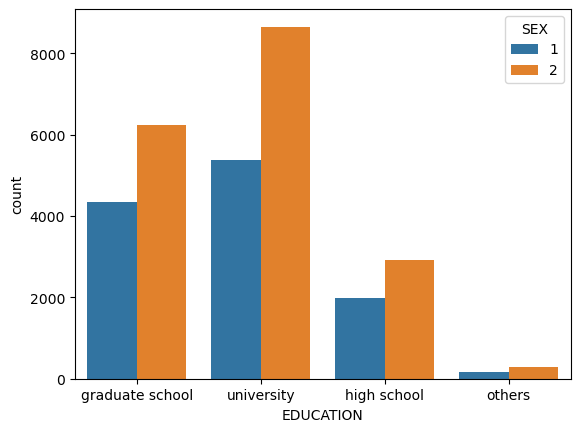

In [18]:
sns.countplot(x=CC_DF['EDUCATION'],hue=CC_DF['SEX'])
plt.xticks(ticks=[0,1,2,3],labels=['graduate school','university','high school','others'])
plt.show

From the above we can stand Females are more educated than males

# Handling Outliers

In [19]:
logger.info('HANDALING OUTLIERS STARTS!')

In [20]:
CC_DF.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Limit Balance Column

skewness -  0.992866960519544


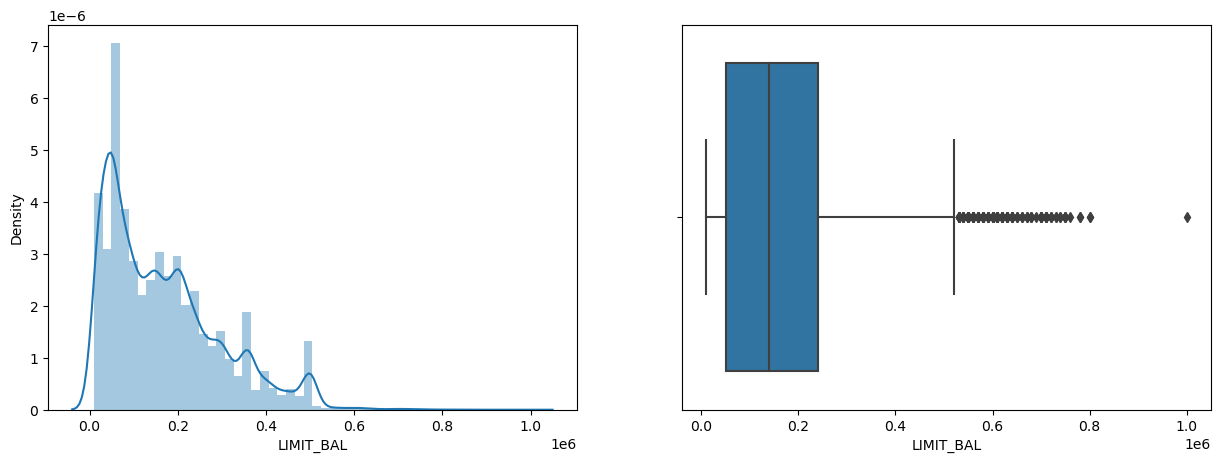

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)

plt.subplot(1,2,1)
sns.distplot(CC_DF['LIMIT_BAL'])

plt.subplot(1,2,2)
sns.boxplot(CC_DF['LIMIT_BAL'])

plt.show

print('skewness - ',CC_DF['LIMIT_BAL'].skew())

# Observations
    > Limit balance column is skewed to the left and skewmess is near to 1
    > In box plot we can see there are outliers to be handeled
    > We will handel the outliers by using quantiles due to the skewed data
    > As we apply quantiles we loss big number of data, so instant of removing outliers i will capp them at upper_limit

In [22]:
percentile25=CC_DF['LIMIT_BAL'].quantile(0.25) # Calculating 25th Quantile
percentile75=CC_DF['LIMIT_BAL'].quantile(0.75) # Calculating 75th Quantile
iqr=percentile75-percentile25 # Finding Inter Quantile Range
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print('25th percentile - ',percentile25,'75th percentile - ',percentile75)
print('Upper Limit - ',upper_limit,'Lower Limit - ',lower_limit)

25th percentile -  50000.0 75th percentile -  240000.0
Upper Limit -  525000.0 Lower Limit -  -235000.0


In [23]:
CC_DF['LIMIT_BAL'] = np.where(CC_DF['LIMIT_BAL'] > upper_limit, upper_limit,
                 np.where(CC_DF['LIMIT_BAL'] < lower_limit, lower_limit,CC_DF['LIMIT_BAL']))

<function matplotlib.pyplot.show(close=None, block=None)>

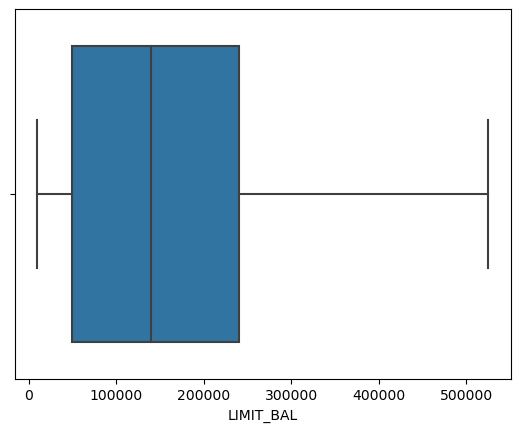

In [24]:
# Ploting box Plot After Outlier capping
sns.boxplot(CC_DF['LIMIT_BAL'])
plt.show

All Outliers are capped according to the limits

# Age Column

skewness -  0.7322458687830562


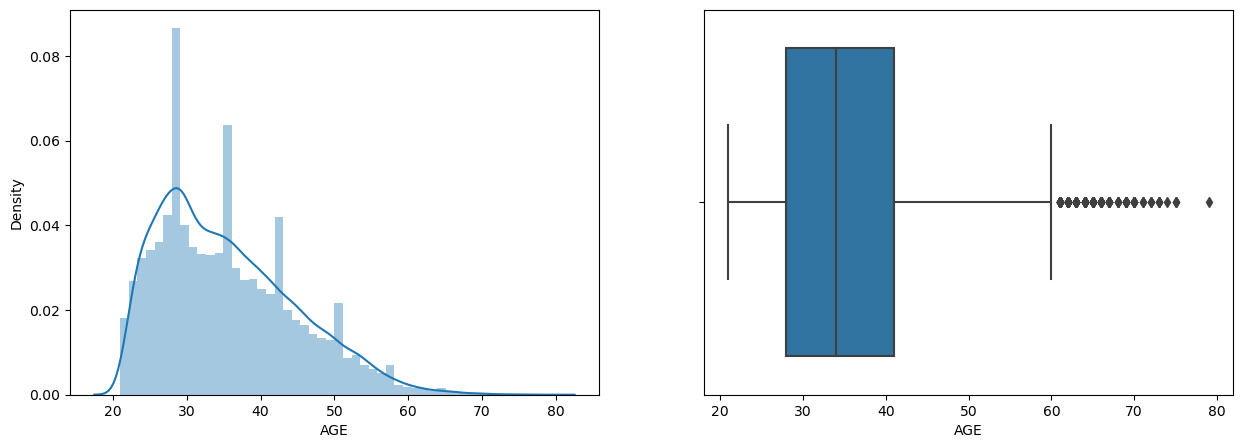

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)

plt.subplot(1,2,1)
sns.distplot(CC_DF['AGE'])

plt.subplot(1,2,2)
sns.boxplot(CC_DF['AGE'])

plt.show

print('skewness - ',CC_DF['AGE'].skew())

# OBSERVATIONS :
    > Age column is skewed to the left.
    > In box plot we can see there are outliers to be handeled.
    > We will handel the outliers by using quantiles due to the skewed data.

    > As we apply quantiles we loss big number of data, So instant of removeing outliers I will capp them at upper_limit

In [26]:
percentile25=CC_DF['AGE'].quantile(0.25) # Calculating 25th Quantile
percentile75=CC_DF['AGE'].quantile(0.75) # Calculating 75th Quantile
iqr=percentile75-percentile25 # Finding Inter Quantile Range
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print('25th percentile - ',percentile25,'75th percentile - ',percentile75)
print('Upper Limit - ',upper_limit,'Lower Limit - ',lower_limit)

25th percentile -  28.0 75th percentile -  41.0
Upper Limit -  60.5 Lower Limit -  8.5


In [27]:
CC_DF['AGE'] = np.where(CC_DF['AGE'] > upper_limit, upper_limit,
                 np.where(CC_DF['AGE'] < lower_limit, lower_limit,CC_DF['AGE']))


<function matplotlib.pyplot.show(close=None, block=None)>

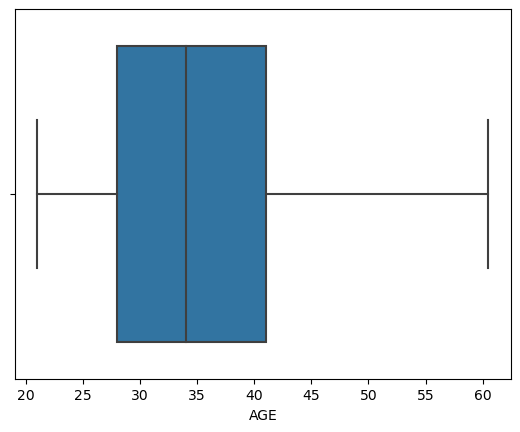

In [28]:
# Ploting box Plot After Outlier capping
sns.boxplot(CC_DF['AGE'])
plt.show

In [29]:
CC_DF['LIMIT_BAL']

0         20000.0
1        120000.0
2         90000.0
3         50000.0
4         50000.0
           ...   
29995    220000.0
29996    150000.0
29997     30000.0
29998     80000.0
29999     50000.0
Name: LIMIT_BAL, Length: 30000, dtype: float64

skewness -  0.9045039681490943


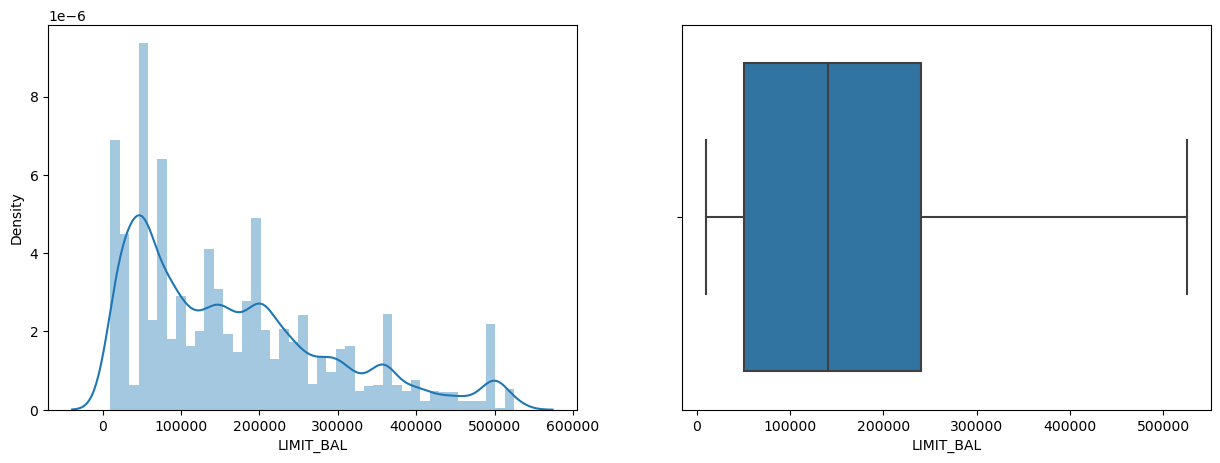

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)

plt.subplot(1,2,1)
sns.distplot(CC_DF['LIMIT_BAL'])

plt.subplot(1,2,2)
sns.boxplot(CC_DF['LIMIT_BAL'])

plt.show

print('skewness - ',CC_DF['LIMIT_BAL'].skew())

In [31]:
logger.info('HANDALING OUTLIERS ENDS!')

<function matplotlib.pyplot.show(close=None, block=None)>

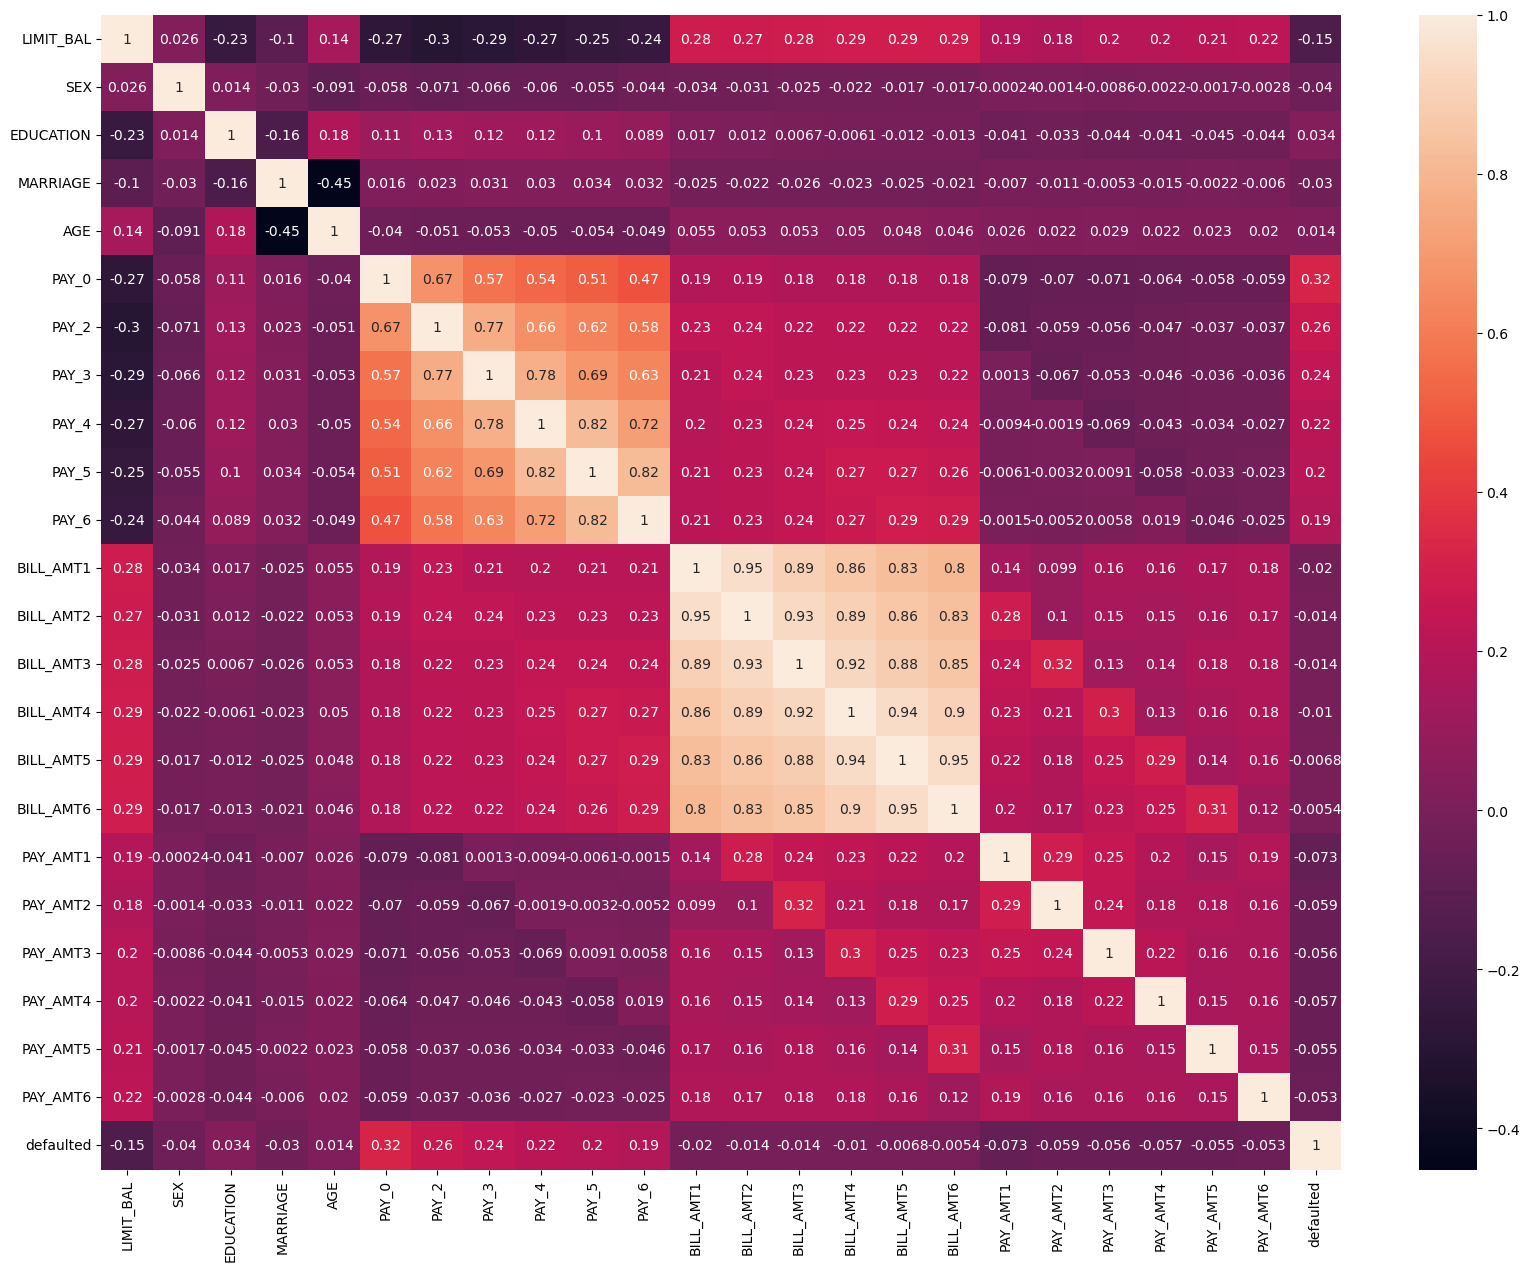

In [32]:
plt.figure(figsize=(20,15))
sns.heatmap(CC_DF.corr(),annot=True)
plt.show

In [33]:
logger.info('EDA ENDS!')

# Handeling Imbalnced Data

In [34]:
logger.info('HANDALING IMBALENCED DATA STARTS!')

In [35]:
print('Non Defaulter count - ',CC_DF['defaulted'].value_counts()[0])
print('Non Defaulter Precent - ',((CC_DF['defaulted'].value_counts()[0])/len(CC_DF))*100,' %')
print('Defaulter count - ',CC_DF['defaulted'].value_counts()[1])
print('Defaulter Precent - ',((CC_DF['defaulted'].value_counts()[1])/len(CC_DF))*100,' %')


Non Defaulter count -  23364
Non Defaulter Precent -  77.88000000000001  %
Defaulter count -  6636
Defaulter Precent -  22.12  %


<AxesSubplot:xlabel='defaulted', ylabel='count'>

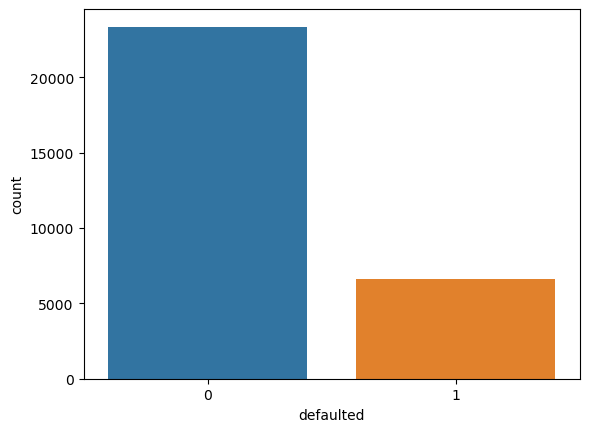

In [36]:
sns.countplot(x=CC_DF['defaulted'])

    > We can see it is an imbalance data set with 22% Defaulters and 78% Non-Defaulters
    > To handle this we have to use Under or Over Sampling

# Over Sampling

In [37]:
logger.info('HANDALING IMBALENCED DATA - OVER SAMPLEING STARTS!')

In [38]:
# Initialise SMOTE object
smote = SMOTE()

In [39]:
# Separate independent and dependent variables
X = CC_DF.drop('defaulted',axis=1)
y = CC_DF['defaulted']

In [40]:
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

In [41]:
# Combine balanced X and y
CC_DF_final = pd.DataFrame(x_smote, columns=CC_DF.columns[:-1])
CC_DF_final['default'] = y_smote

CC_DF_final.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24.0,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000.0,2,2,2,26.0,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000.0,2,2,2,34.0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000.0,2,2,1,37.0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000.0,1,2,1,57.0,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [42]:
logger.info('HANDALING IMBALENCED DATA - OVER SAMPLEING ENDS!')

<AxesSubplot:xlabel='default', ylabel='count'>

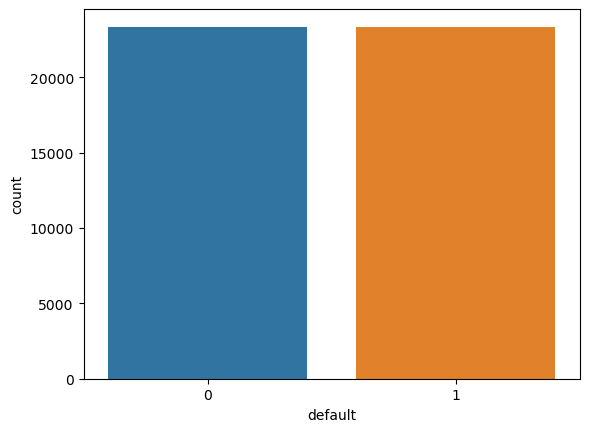

In [43]:
sns.countplot(x=CC_DF_final['default'])

Now dataset is balanced

In [44]:
logger.info('HANDALING IMBALENCED DATA ENDS!')

> After balancing the data here we find that the data that both defaulter and non defaulter are of same count 

In [45]:
CC_DF_final.to_csv('Final_data.csv',index = True)

In [46]:
data1 = pd.read_csv('Final_data.csv')

In [47]:
data1

,Unnamed: 0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,0,20000.0,2,2,1,24.000000,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,1,120000.0,2,2,2,26.000000,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,90000.0,2,2,2,34.000000,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,3,50000.0,2,2,1,37.000000,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,4,50000.0,1,2,1,57.000000,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,46723,20000.0,1,2,1,25.636815,0,0,0,0,...,12203,13302,13380,1406,2612,1027,1303,438,615,1
46724,46724,50000.0,2,1,1,34.490833,1,0,0,0,...,46465,22527,19799,2185,2079,1587,606,546,805,1
46725,46725,30000.0,1,2,1,43.872612,0,1,0,0,...,21188,21677,22900,382,1657,1657,1106,1696,319,1
46726,46726,20000.0,1,2,2,24.000000,2,2,4,4,...,1650,1650,1650,0,0,0,0,0,0,1


# Splitting

In [44]:
logger.info('DATA PREPARING FOR MODELING STARTS!')

In [45]:
X = CC_DF_final.drop('default',axis=1)
y = CC_DF_final['default']

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)


# Scaling the data

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [48]:
logger.info('DATA PREPARING FOR MODELING ENDS!')

# Model Building

In [49]:
logger.info('MODELING STARTS!')

In [50]:
# Helper Function for printing Accuracy matrices, plotting Confusiuon matrix and ROC curve

def helper(model,X_train,y_train,X_test,y_test):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_acc = accuracy_score(train_pred, y_train)
    test_acc = accuracy_score(test_pred, y_test)
    prec = precision_score(y_test, test_pred)
    recc = recall_score(y_test, test_pred)
    f1 = f1_score(y_test, test_pred)
    acc_matrices = {'Train accuracy':train_acc,'Test accuracy':test_acc,'Precision':prec,'Recall':recc,'F1 Score':f1}

    print('\nTraining Accuracy Score: ',train_acc)
    print('Testing Accuracy Score: ',test_acc)
    print('Precision on test data: ',prec)
    print('Recall on test data: ',recc)
    print('F1 score on test data: ',f1)
    print('\n========================================================')
    print('Classification Report on Train data')
    print(classification_report(train_pred, y_train))
    print('\n========================================================')
    print('Classification Report on Test data')
    print(classification_report(test_pred, y_test))

    print('\n========================================================')
    # Plotting Confusion Matrix and ROC curve
    f,ax =  plt.subplots(1,2,figsize=(14,6))
    #plt.figure(figsize=(6,4))
    ConfMatrix = confusion_matrix(test_pred, y_test)
    sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
                xticklabels = ['Non-default', 'Default'], 
                yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
    ax[0].set_ylabel('True label')
    ax[0].set_xlabel('Predicted label')
    ax[0].set_title('Confusion Matrix')

    global fpr,tpr,thresholds
    fpr,tpr,thresholds = roc_curve(test_pred, y_test)
    ax[1].plot(fpr,tpr,color = 'r')
    ax[1].plot(fpr,fpr,color = 'green')
    ax[1].set_ylabel('TPR')
    ax[1].set_xlabel('FPR')
    ax[1].set_title('ROC Curve')
    plt.show()
    return acc_matrices

# 1. Logistic Regression

In [51]:
logger.info('MODEL - LOGISTIC REGRESSION STARTS!')

In [52]:
LogR = LogisticRegression()
LogR.fit(X_train_scaled,y_train)

LogisticRegression()

In [53]:
X_test_scaled = scaler.transform(X_test)


Training Accuracy Score:  0.7227358329053244
Testing Accuracy Score:  0.7166581064886149
Precision on test data:  0.7184383978367416
Recall on test data:  0.721119592875318
F1 score on test data:  0.7197764984761259

Classification Report on Train data
              precision    recall  f1-score   support

           0       0.73      0.72      0.72     17730
           1       0.72      0.72      0.72     17316

    accuracy                           0.72     35046
   macro avg       0.72      0.72      0.72     35046
weighted avg       0.72      0.72      0.72     35046


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      5765
           1       0.72      0.72      0.72      5917

    accuracy                           0.72     11682
   macro avg       0.72      0.72      0.72     11682
weighted avg       0.72      0.72      0.72     11682




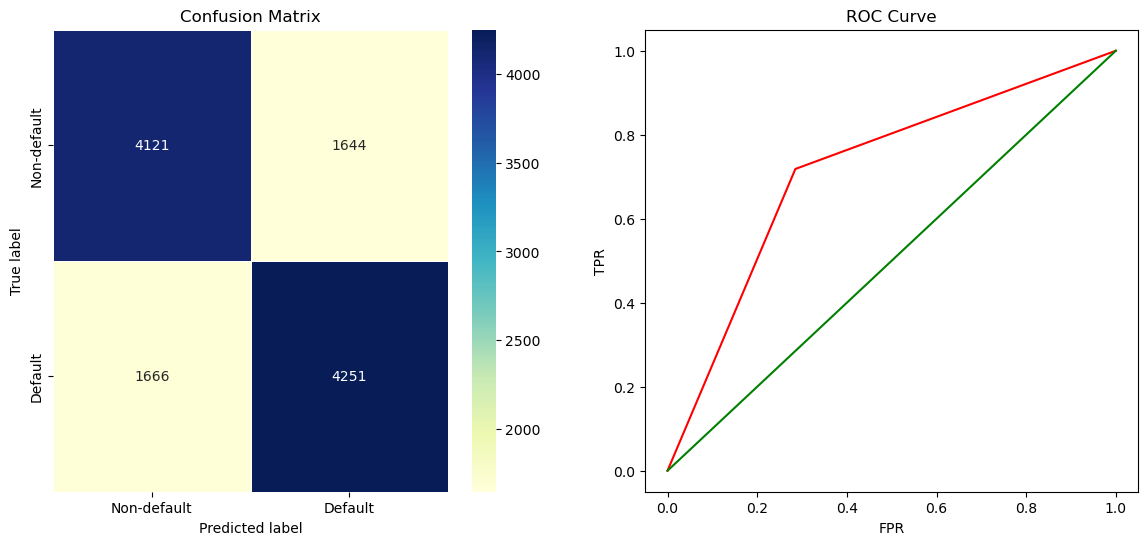

{'Train accuracy': 0.7227358329053244,
 'Test accuracy': 0.7166581064886149,
 'Precision': 0.7184383978367416,
 'Recall': 0.721119592875318,
 'F1 Score': 0.7197764984761259}

In [54]:
helper(LogR,X_train_scaled,y_train,X_test_scaled, y_test)

In [55]:
logger.info('MODEL - LOGISTIC REGRESSION ENDS!')

# 2. Decicion Tree

In [56]:
logger.info('MODEL - DECICION TREE STARTS!')

In [57]:
D_tree = DecisionTreeClassifier()
D_tree.fit(X_train_scaled,y_train)

DecisionTreeClassifier()


Training Accuracy Score:  0.9996005250242538
Testing Accuracy Score:  0.7558637219654168
Precision on test data:  0.7527828542947334
Recall on test data:  0.7686174724342664
F1 score on test data:  0.7606177606177607

Classification Report on Train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17587
           1       1.00      1.00      1.00     17459

    accuracy                           1.00     35046
   macro avg       1.00      1.00      1.00     35046
weighted avg       1.00      1.00      1.00     35046


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      5663
           1       0.77      0.75      0.76      6019

    accuracy                           0.76     11682
   macro avg       0.76      0.76      0.76     11682
weighted avg       0.76      0.76      0.76     11682




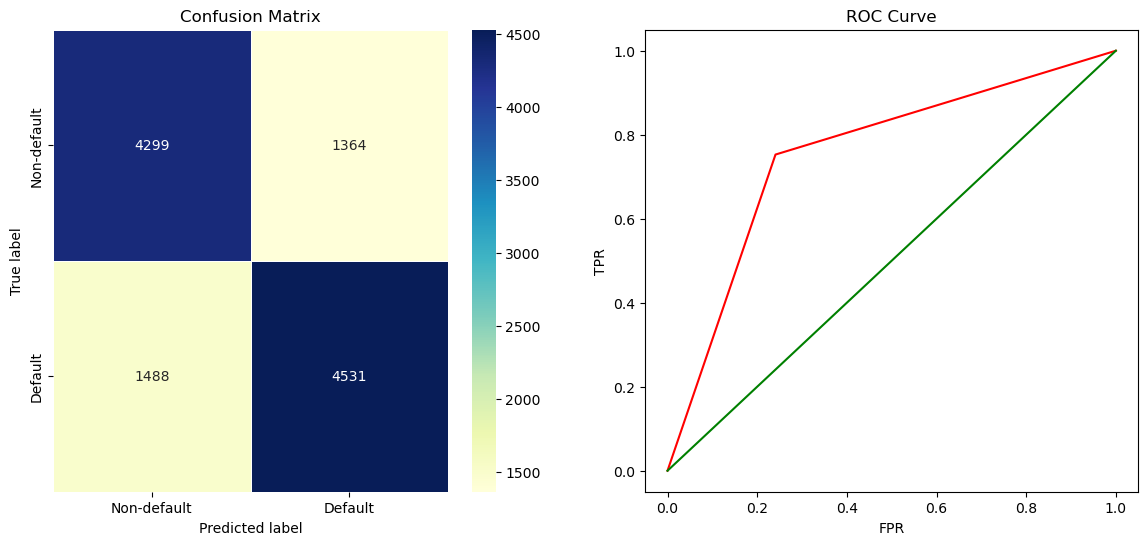

{'Train accuracy': 0.9996005250242538,
 'Test accuracy': 0.7558637219654168,
 'Precision': 0.7527828542947334,
 'Recall': 0.7686174724342664,
 'F1 Score': 0.7606177606177607}

In [58]:
helper(D_tree,X_train_scaled,y_train,X_test_scaled,y_test)

In [59]:
logger.info('MODEL - DECICION TREE ENDS!')

# 3.Random Forest

In [60]:
logger.info('MODEL - RANDOM FOREST STARTS!')

In [61]:
RF = RandomForestClassifier()
RF.fit(X_train_scaled,y_train)

RandomForestClassifier()


Training Accuracy Score:  0.9996005250242538
Testing Accuracy Score:  0.8442047594589968
Precision on test data:  0.8597916298781565
Recall on test data:  0.8259541984732824
F1 score on test data:  0.842533310261291

Classification Report on Train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17577
           1       1.00      1.00      1.00     17469

    accuracy                           1.00     35046
   macro avg       1.00      1.00      1.00     35046
weighted avg       1.00      1.00      1.00     35046


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      6019
           1       0.83      0.86      0.84      5663

    accuracy                           0.84     11682
   macro avg       0.84      0.84      0.84     11682
weighted avg       0.84      0.84      0.84     11682




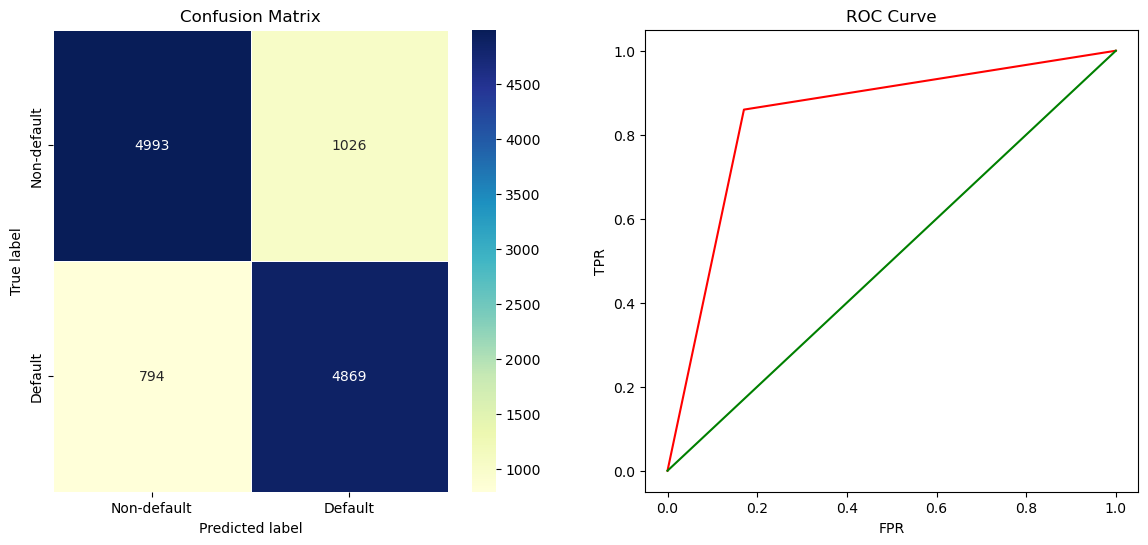

{'Train accuracy': 0.9996005250242538,
 'Test accuracy': 0.8442047594589968,
 'Precision': 0.8597916298781565,
 'Recall': 0.8259541984732824,
 'F1 Score': 0.842533310261291}

In [62]:
helper(RF,X_train_scaled,y_train,X_test_scaled,y_test)

In [63]:
logger.info('MODEL - RANDOM FOREST ENDS!')

# 4. Support Vector Machine

In [64]:
logger.info('MODEL - SUPPORT VECTOR MACHINE STARTS!')

In [65]:
svm = SVC()
svm.fit(X_train_scaled,y_train)

SVC()


Training Accuracy Score:  0.7725560691662386
Testing Accuracy Score:  0.7619414483821263
Precision on test data:  0.7778372591006424
Recall on test data:  0.739440203562341
F1 score on test data:  0.7581528828593791

Classification Report on Train data
              precision    recall  f1-score   support

           0       0.80      0.76      0.78     18582
           1       0.74      0.79      0.77     16464

    accuracy                           0.77     35046
   macro avg       0.77      0.77      0.77     35046
weighted avg       0.77      0.77      0.77     35046


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.78      0.75      0.77      6078
           1       0.74      0.78      0.76      5604

    accuracy                           0.76     11682
   macro avg       0.76      0.76      0.76     11682
weighted avg       0.76      0.76      0.76     11682




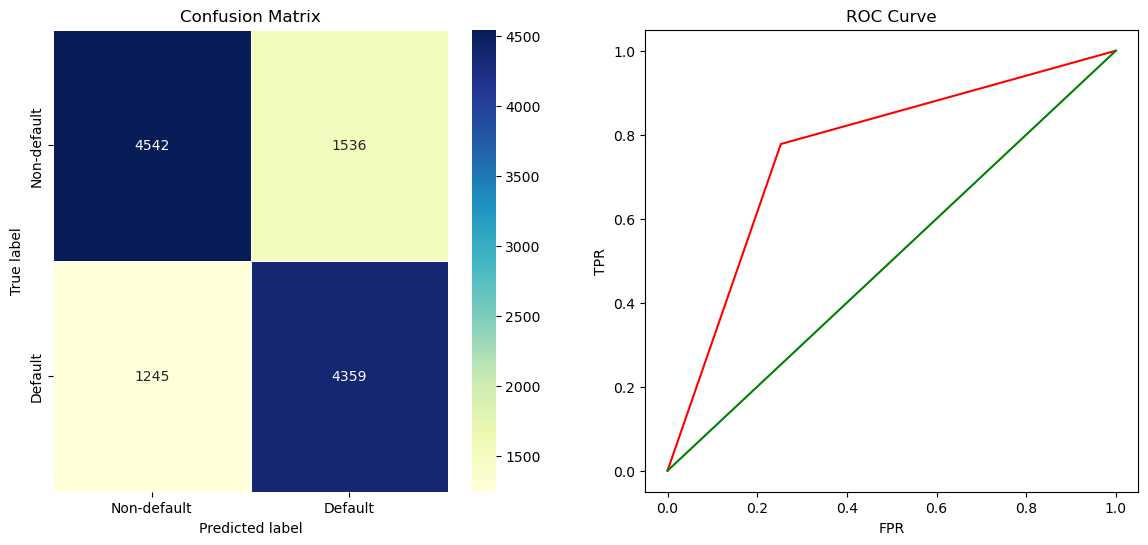

{'Train accuracy': 0.7725560691662386,
 'Test accuracy': 0.7619414483821263,
 'Precision': 0.7778372591006424,
 'Recall': 0.739440203562341,
 'F1 Score': 0.7581528828593791}

In [66]:
helper(svm,X_train_scaled,y_train,X_test_scaled,y_test)

In [67]:
logger.info('MODEL - SUPPORT VECTOR MACHINE ENDS!')

In [111]:
model={'Logistic Regression':{'Train accuracy': 0.7246476060035382,
 'Test accuracy': 0.7154596815613765,
 'Precision': 0.7197060331567253,
 'Recall': 0.714334181509754,
 'F1 Score': 0.7170100459730973},'Decicion Tree':{'Train accuracy': 0.9996290589510929,
 'Test accuracy': 0.746276322547509,
 'Precision': 0.7456831517183571,
 'Recall': 0.7545377438507209,
 'F1 Score': 0.7500843170320405},'Random Forest':{'Train accuracy': 0.9996290589510929,
 'Test accuracy': 0.8403526793357302,
 'Precision': 0.8584133760227677,
 'Recall': 0.8186598812553011,
 'F1 Score': 0.8380654684379614},'SVC':{'Train accuracy': 0.7725560691662386,
 'Test accuracy': 0.7619414483821263,
 'Precision': 0.7778372591006424,
 'Recall': 0.739440203562341,
 'F1 Score': 0.7581528828593791}}

In [112]:
model=pd.DataFrame(model)
model

,Logistic Regression,Decicion Tree,Random Forest,SVC
Train accuracy,0.724648,0.999629,0.999629,0.772556
Test accuracy,0.715460,0.746276,0.840353,0.761941
Precision,0.719706,0.745683,0.858413,0.777837
Recall,0.714334,0.754538,0.818660,0.739440
F1 Score,0.717010,0.750084,0.838065,0.758153


    All model Accuracy was good but Decicion Tree and Random Forest was to good
    Decicion Tree vs Random Frorest
    - Both training accuracy was good but Random Forest test accuracy was also high
    -  F1 Score is also high for Random Forest 
    - So i will go with Random Forest

In [113]:
logger.info('MODELING ENDS!')

# Feature Engineering

In [114]:
logger.info('FEATURE ENGINEERING STARTS!')

In [115]:
CC_DF_FE = CC_DF_final.copy()
CC_DF_FE

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,AVG_BILL_AMT
0,20000.0,2,2,1,24.000000,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,7704.000000
1,120000.0,2,2,2,26.000000,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,14359.500000
2,90000.0,2,2,2,34.000000,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,88695.500000
3,50000.0,2,2,1,37.000000,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,206711.500000
4,50000.0,1,2,1,57.000000,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,93396.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,80000.0,1,2,1,30.556126,2,0,0,2,0,...,62941,12056,3014,5155,888,533,355,1111,1,380833.333333
46724,10000.0,1,2,1,47.592799,0,0,0,0,0,...,5508,5947,947,1736,441,264,532,499,1,23560.166667
46725,280000.0,2,2,1,45.111629,0,0,-1,-1,0,...,224,1139,0,1340,427,0,1139,1846,1,3089.833333
46726,10000.0,1,2,1,28.785232,3,2,2,1,2,...,4433,4253,915,117,1007,15,20,393,1,21078.833333


In [116]:
CC_DF_FE.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default',
       'AVG_BILL_AMT'],
      dtype='object')

# AVG_BILL_AMT (creating new column)

In [117]:
CC_DF_FE['AVG_BILL_AMT']=(CC_DF_FE['BILL_AMT1']+CC_DF_FE['BILL_AMT2']+CC_DF_FE['BILL_AMT3']+CC_DF_FE['BILL_AMT4']+CC_DF_FE['BILL_AMT5']+CC_DF_FE['BILL_AMT6']/6)


In [118]:
X=CC_DF_FE.drop('default',axis=1)
y=CC_DF_FE['default']

In [119]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [120]:
X_train_scaled=scaler.fit_transform(X_train)

In [121]:
X_test_scaled=scaler.transform(X_test)

In [122]:
RF.fit(X_train_scaled,y_train)

RandomForestClassifier()


Training Accuracy Score:  0.9995719910974148
Testing Accuracy Score:  0.8430063345317582
Precision on test data:  0.8575174825174825
Recall on test data:  0.8279878460499662
F1 score on test data:  0.8424939883201649

Classification Report on Train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17599
           1       1.00      1.00      1.00     17447

    accuracy                           1.00     35046
   macro avg       1.00      1.00      1.00     35046
weighted avg       1.00      1.00      1.00     35046


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      5962
           1       0.83      0.86      0.84      5720

    accuracy                           0.84     11682
   macro avg       0.84      0.84      0.84     11682
weighted avg       0.84      0.84      0.84     11682




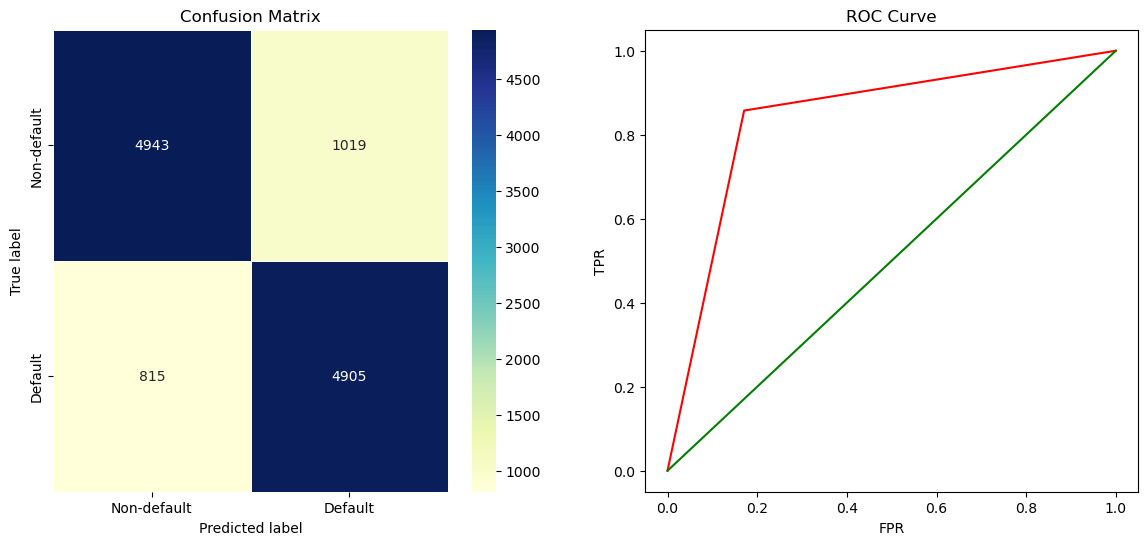

{'Train accuracy': 0.9995719910974148,
 'Test accuracy': 0.8430063345317582,
 'Precision': 0.8575174825174825,
 'Recall': 0.8279878460499662,
 'F1 Score': 0.8424939883201649}

In [123]:
helper(RF,X_train_scaled,y_train,X_test_scaled,y_test)

In [124]:
model['RF with with avg bill']= [ 0.9996861268047709, 0.839924670433145, 0.851911976911977, 0.8182605682605683, 0.8347472605160834]

# AVG_PAY_AMT (creating new column)

In [125]:
CC_DF_FE['AVG_PAY_AMT']=(CC_DF_FE['PAY_0']+CC_DF_FE['PAY_2']+CC_DF_FE['PAY_3']+CC_DF_FE['PAY_4']+CC_DF_FE['PAY_5']+CC_DF_FE['PAY_6']/6)
CC_DF_FE.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,AVG_BILL_AMT,AVG_PAY_AMT
46723,80000.0,1,2,1,30.556126,2,0,0,2,0,...,12056,3014,5155,888,533,355,1111,1,380833.333333,4.000000
46724,10000.0,1,2,1,47.592799,0,0,0,0,0,...,5947,947,1736,441,264,532,499,1,23560.166667,0.000000
46725,280000.0,2,2,1,45.111629,0,0,-1,-1,0,...,1139,0,1340,427,0,1139,1846,1,3089.833333,-2.166667
46726,10000.0,1,2,1,28.785232,3,2,2,1,2,...,4253,915,117,1007,15,20,393,1,21078.833333,10.166667
46727,90000.0,2,2,1,24.438104,0,1,0,0,0,...,68603,3525,3280,3000,3000,2824,4123,1,395464.833333,1.000000


In [126]:
X=CC_DF_FE.drop('default',axis=1)
y=CC_DF_FE['default']

In [127]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [128]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [129]:
RF.fit(X_train_scaled,y_train)

RandomForestClassifier()


Training Accuracy Score:  0.9996575928779319
Testing Accuracy Score:  0.8341037493579867
Precision on test data:  0.8505828329212293
Recall on test data:  0.8151658767772512
F1 score on test data:  0.8324978392394123

Classification Report on Train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17588
           1       1.00      1.00      1.00     17458

    accuracy                           1.00     35046
   macro avg       1.00      1.00      1.00     35046
weighted avg       1.00      1.00      1.00     35046


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      6020
           1       0.82      0.85      0.83      5662

    accuracy                           0.83     11682
   macro avg       0.83      0.83      0.83     11682
weighted avg       0.83      0.83      0.83     11682




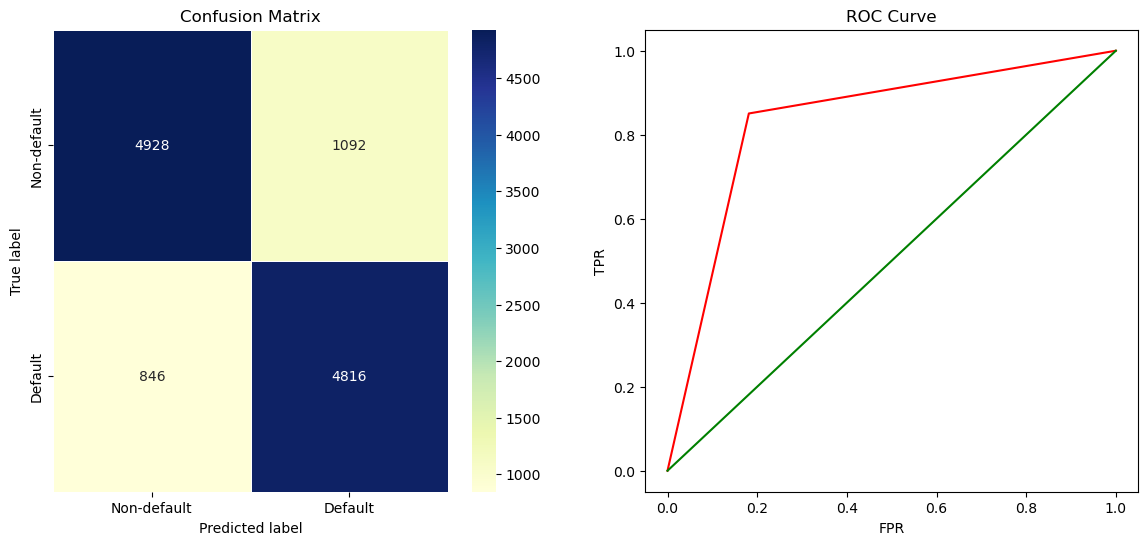

{'Train accuracy': 0.9996575928779319,
 'Test accuracy': 0.8341037493579867,
 'Precision': 0.8505828329212293,
 'Recall': 0.8151658767772512,
 'F1 Score': 0.8324978392394123}

In [130]:
helper(RF,X_train_scaled,y_train,X_test_scaled,y_test)

In [131]:
model['Random Forest with AVG_PAY']=[0.9996861268047709,0.8385550419448724,0.8540003547986518,0.8191254041177471,0.8361994094146258]

In [132]:
logger.info('FEATURE ENGINEERING ENDS!')

In [133]:
model.apply(lambda x:x*100)

,Logistic Regression,Decicion Tree,Random Forest,SVC,RF with with avg bill,Random Forest with AVG_PAY
Train accuracy,72.464761,99.962906,99.962906,77.255607,99.968613,99.968613
Test accuracy,71.545968,74.627632,84.035268,76.194145,83.992467,83.855504
Precision,71.970603,74.568315,85.841338,77.783726,85.191198,85.400035
Recall,71.433418,75.453774,81.865988,73.944020,81.826057,81.912540
F1 Score,71.701005,75.008432,83.806547,75.815288,83.474726,83.619941


    Feature Enginering:
    > After creating new column Average Bill Amount it healped model F1 score.
    > Average Pay Amount was not helpful it actule draged down the F1 Score to 83.61%
    > So I will continue with AVG_BILL and Drop AVG_PAY column

# Final model training with Random Forest and new column AVG_BILL

In [134]:
logger.info('FINAL MODEL BUILDING STARTS!')

In [135]:
CC_DF_final.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,AVG_BILL_AMT
0,20000.0,2,2,1,24.0,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,7704.0
1,120000.0,2,2,2,26.0,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,14359.5
2,90000.0,2,2,2,34.0,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,88695.5
3,50000.0,2,2,1,37.0,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,206711.5
4,50000.0,1,2,1,57.0,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,93396.5


In [136]:
CC_DF_final['AVG_BILL_AMT']=(CC_DF_final['BILL_AMT1']+CC_DF_final['BILL_AMT2']+CC_DF_final['BILL_AMT3']+CC_DF_final['BILL_AMT4']+CC_DF_final['BILL_AMT5']+CC_DF_final['BILL_AMT6']/6)
CC_DF_final.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,AVG_BILL_AMT
46723,80000.0,1,2,1,30.556126,2,0,0,2,0,...,62941,12056,3014,5155,888,533,355,1111,1,380833.333333
46724,10000.0,1,2,1,47.592799,0,0,0,0,0,...,5508,5947,947,1736,441,264,532,499,1,23560.166667
46725,280000.0,2,2,1,45.111629,0,0,-1,-1,0,...,224,1139,0,1340,427,0,1139,1846,1,3089.833333
46726,10000.0,1,2,1,28.785232,3,2,2,1,2,...,4433,4253,915,117,1007,15,20,393,1,21078.833333
46727,90000.0,2,2,1,24.438104,0,1,0,0,0,...,66925,68603,3525,3280,3000,3000,2824,4123,1,395464.833333


In [137]:
X=CC_DF_final.drop('default',axis=1)
y=CC_DF_final['default']

In [138]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [139]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [140]:
RF_F=RandomForestClassifier()

In [141]:
RF_F.fit(X_train_scaled,y_train)

RandomForestClassifier()


Training Accuracy Score:  0.9996005250242538
Testing Accuracy Score:  0.8441191576784797
Precision on test data:  0.8595128838686904
Recall on test data:  0.8261238337574215
F1 score on test data:  0.8424876740766369

Classification Report on Train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17575
           1       1.00      1.00      1.00     17471

    accuracy                           1.00     35046
   macro avg       1.00      1.00      1.00     35046
weighted avg       1.00      1.00      1.00     35046


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      6016
           1       0.83      0.86      0.84      5666

    accuracy                           0.84     11682
   macro avg       0.84      0.84      0.84     11682
weighted avg       0.84      0.84      0.84     11682




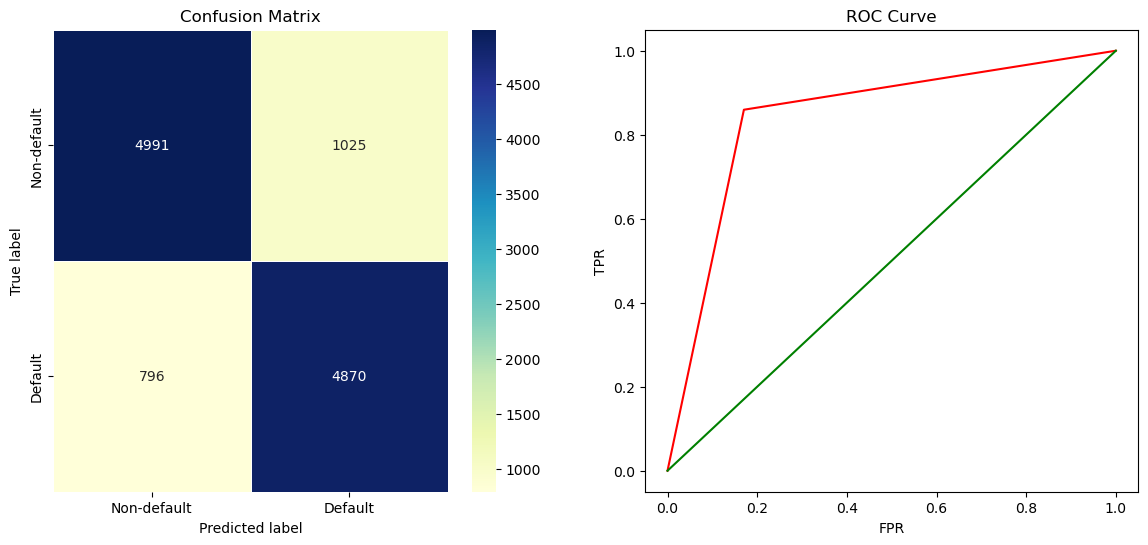

{'Train accuracy': 0.9996005250242538,
 'Test accuracy': 0.8441191576784797,
 'Precision': 0.8595128838686904,
 'Recall': 0.8261238337574215,
 'F1 Score': 0.8424876740766369}

In [142]:
helper(RF_F,X_train_scaled,y_train,X_test_scaled,y_test)

In [143]:
fin_m=({'Scores':{'Train accuracy': 0.9996290589510929,
 'Test accuracy': 0.8421503167265879,
 'Precision': 0.8604733938423207,
 'Recall': 0.820186598812553,
 'F1 Score': 0.8398471426089976}})
final_model= pd.DataFrame(fin_m)

In [144]:
final_model

,Scores
F1 Score,0.839847
Precision,0.860473
Recall,0.820187
Test accuracy,0.842150
Train accuracy,0.999629


In [145]:
logger.info(final_model)


In [146]:
logger.info('FINAL MODEL BUILDING ENDS!')

# Saving the file

In [147]:
logger.info('SAVING THE MODEL...')

In [148]:
pickle.dump(RF_F, open('ccdp.pkl', 'wb'))

logger.info('MODEL SAVED!')

In [149]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

# Compress the model.pkl, to easy the process of deployement

In [150]:
import bz2 as bz2

In [151]:
def compressed_pickle(title, data):
    with bz2.BZ2File(title + '.pbz2', 'w') as f:
        pickle.dump(data, f)

In [152]:
compressed_pickle('ccdp', RF_F)

In [153]:
logger.info('PROJECT RUNNING ENDS!')